<a href="https://colab.research.google.com/github/Athitiya00/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [ ]:
Name = 'อาธิติยา ธรรมวงษา'
ID = '623021058-0'

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

021:22:14


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-9.426576,-4.376342,3.475123,-9.964274,-7.473798,-8.877976,-5.008762,6.322720,-3.828949,1.867419,-8.083785,7.770605,-6.873573,-6.108583,0.318526,8.018442,4.662985,8.758816,5.459240,-2.219485,-1.991638,3.436048,-8.752684,19.180239
1,-1.504680,-4.798100,-9.477033,7.594804,8.830604,9.330478,8.785840,-8.155954,7.534038,-9.153681,8.121219,6.385155,8.018150,5.199183,8.194834,5.343283,8.596106,-8.518229,2.092111,6.203299,7.313643,-9.502662,-9.596201,-45.513311
2,-0.724281,-3.474088,-7.808672,9.030851,8.839823,8.814363,9.691501,-9.396026,7.542054,-8.843869,8.885087,4.696764,7.429579,5.172997,6.781114,4.759322,8.378016,-8.474100,3.362103,6.338624,8.772902,-9.134738,-6.948176,-43.673691
3,8.037503,7.536090,4.304222,1.368213,7.655374,5.877472,-10.673538,3.329210,1.672791,-0.114393,-2.519571,-3.016721,-4.771517,6.474865,5.012202,-6.992676,3.322683,6.385760,6.283564,-3.763382,-4.210971,-4.080487,15.072180,-18.402434
4,-0.643676,-5.098232,6.426570,-2.833146,-4.292058,-3.105426,2.996073,-3.192412,-4.275848,6.586916,1.208168,5.088648,8.835935,-5.743763,0.456918,-6.460829,9.504938,5.275986,2.749596,-6.231896,8.339736,-10.052189,-10.196465,-48.260945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.471211,-3.878440,4.976258,-2.952263,-6.353971,-2.629481,4.286065,-2.341729,-4.328366,8.389839,1.109955,5.005765,9.732920,-4.022717,-1.276452,-7.988043,9.769834,6.570557,4.351780,-4.629683,8.995164,-8.866562,-7.756880,-42.332809
9996,-10.560733,-6.007623,5.014512,-12.238524,-5.664494,-10.884708,-2.081247,4.273204,-4.103752,1.356016,-10.396789,7.701799,-7.347034,-6.822259,0.699940,6.524154,6.611412,7.812663,3.459987,-2.957703,-1.717942,3.612419,-12.015246,20.062094
9997,-0.274193,-5.624442,-4.132013,-3.784893,-7.780816,5.146189,4.412614,-9.097709,-5.357306,-3.464257,6.210606,-0.096741,0.517492,-4.799790,1.843947,6.922275,12.290972,-8.767819,0.280662,-7.123301,5.770248,3.728265,-11.248883,20.641323
9998,-6.004195,6.431052,7.613415,5.964495,-0.585159,-8.024162,-3.890882,-3.630688,-2.221155,-0.537819,-0.668570,-6.532314,7.532070,3.238244,5.107010,-6.098886,2.428073,3.820027,-2.835451,-0.432642,4.799660,2.761357,12.862104,15.806783


In [ ]:
Data.shape#ดูนาดของข้อมูล

(10000, 24)

In [ ]:
corr = np.corrcoef(Data.to_numpy().T)#ดูความสัมพันธ์ของตัวแปรในชุดข้อมูล

In [ ]:
corr.shape #ดูขนาดของ correlation

(24, 24)

In [ ]:
corr

array([[ 1.        ,  0.07097861,  0.00727628,  0.17032666,  0.05784125,
         0.34922848,  0.00144648, -0.10300148,  0.23787282, -0.13525164,
        -0.00252538, -0.26515726, -0.05124382,  0.31435019, -0.03934624,
        -0.43603255, -0.34655407, -0.13580194, -0.24825093, -0.27314994,
        -0.34468117, -0.04300807,  0.07097861, -0.04300807],
       [ 0.07097861,  1.        ,  0.33942648,  0.12921421,  0.20167379,
        -0.03281745, -0.69963707,  0.53963616, -0.1704818 , -0.04027192,
        -0.32157628, -0.28133272, -0.0490309 , -0.0157962 ,  0.31280799,
        -0.40457474, -0.28033617,  0.00850245, -0.1391372 , -0.0170169 ,
        -0.10889668,  0.11518462,  1.        ,  0.11518462],
       [ 0.00727628,  0.33942648,  1.        , -0.09281998, -0.38138357,
        -0.47132263, -0.44587784,  0.12455158, -0.28315809,  0.12305369,
        -0.15910026,  0.01825615, -0.22907995, -0.08723838,  0.52846964,
        -0.33028463, -0.04399669,  0.35492636,  0.28487653, -0.60336777,
  

In [ ]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')
#หาค่า correlation ที่ซ้ำกัน

row = 21 column = 23 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


จากการวนลูปพบว่าค่าที่มีค่าที่เท่ากันหรือซ้ำกัน จึงจำเป็นที่จะต้องตัดข้อมูลออกก่อนนำไปใช้ โดยการแสดงข้อมูลทั้งหมด

In [ ]:
newdata = Data.iloc[1:,:24]
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
1,-1.504680,-4.798100,-9.477033,7.594804,8.830604,9.330478,8.785840,-8.155954,7.534038,-9.153681,8.121219,6.385155,8.018150,5.199183,8.194834,5.343283,8.596106,-8.518229,2.092111,6.203299,7.313643,-9.502662,-9.596201,-45.513311
2,-0.724281,-3.474088,-7.808672,9.030851,8.839823,8.814363,9.691501,-9.396026,7.542054,-8.843869,8.885087,4.696764,7.429579,5.172997,6.781114,4.759322,8.378016,-8.474100,3.362103,6.338624,8.772902,-9.134738,-6.948176,-43.673691
3,8.037503,7.536090,4.304222,1.368213,7.655374,5.877472,-10.673538,3.329210,1.672791,-0.114393,-2.519571,-3.016721,-4.771517,6.474865,5.012202,-6.992676,3.322683,6.385760,6.283564,-3.763382,-4.210971,-4.080487,15.072180,-18.402434
4,-0.643676,-5.098232,6.426570,-2.833146,-4.292058,-3.105426,2.996073,-3.192412,-4.275848,6.586916,1.208168,5.088648,8.835935,-5.743763,0.456918,-6.460829,9.504938,5.275986,2.749596,-6.231896,8.339736,-10.052189,-10.196465,-48.260945
5,7.688778,6.936452,2.622817,0.924338,7.582977,5.047302,-11.238402,3.530901,2.979700,-1.214419,1.024132,-2.367583,-5.368529,5.219433,3.753264,-5.530650,5.422460,6.861780,4.034253,-5.124204,-4.451557,-4.871067,13.872903,-22.355335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.471211,-3.878440,4.976258,-2.952263,-6.353971,-2.629481,4.286065,-2.341729,-4.328366,8.389839,1.109955,5.005765,9.732920,-4.022717,-1.276452,-7.988043,9.769834,6.570557,4.351780,-4.629683,8.995164,-8.866562,-7.756880,-42.332809
9996,-10.560733,-6.007623,5.014512,-12.238524,-5.664494,-10.884708,-2.081247,4.273204,-4.103752,1.356016,-10.396789,7.701799,-7.347034,-6.822259,0.699940,6.524154,6.611412,7.812663,3.459987,-2.957703,-1.717942,3.612419,-12.015246,20.062094
9997,-0.274193,-5.624442,-4.132013,-3.784893,-7.780816,5.146189,4.412614,-9.097709,-5.357306,-3.464257,6.210606,-0.096741,0.517492,-4.799790,1.843947,6.922275,12.290972,-8.767819,0.280662,-7.123301,5.770248,3.728265,-11.248883,20.641323
9998,-6.004195,6.431052,7.613415,5.964495,-0.585159,-8.024162,-3.890882,-3.630688,-2.221155,-0.537819,-0.668570,-6.532314,7.532070,3.238244,5.107010,-6.098886,2.428073,3.820027,-2.835451,-0.432642,4.799660,2.761357,12.862104,15.806783


### 2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [ ]:
from sklearn.cluster import KMeans
#import function ที่ต้องการใช้ในการทำ K-mean

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state=2021)
#กำหนดค่า k = 3
#random_state=2021 กำหนดให้เริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

In [ ]:
kmeans.fit(Data)#คำนวณหาจุด cluter centers ของ Data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_
#แสดงจุดที่คำนวณได้

array([[ 2.83618572e+00,  2.70143009e+00,  1.19265518e+00,
         3.57801604e+00,  2.29431253e+00,  1.09385669e+00,
         1.47892758e+00,  1.28021966e-01, -2.41265325e+00,
        -1.83645206e+00, -2.58226871e+00, -1.26365715e+00,
         2.28808371e+00, -4.36963615e-01,  7.76518604e-01,
        -5.16086641e+00,  3.35278917e+00,  3.20557785e+00,
         1.15550676e-01,  7.85986486e-01,  4.77217761e-01,
         1.85727429e-02,  5.40286019e+00,  2.09286371e+00],
       [ 8.49045826e-01, -2.14337469e+00, -1.37824045e+00,
        -5.97583891e+00, -3.50760501e+00, -1.73865645e+00,
         1.52050708e-01, -2.35626108e+00, -4.52989628e+00,
        -7.84917779e-01, -2.99626476e+00,  8.50434975e-01,
         3.30434375e-01, -4.33792046e+00, -1.91865789e+00,
         3.30028282e+00,  1.09021905e+00, -2.13472042e+00,
        -7.87157074e-01, -3.28175978e+00, -1.01724184e+00,
         4.70953642e+00, -4.28674937e+00,  2.55476821e+01],
       [-1.07973319e+00, -4.14225686e+00, -1.26174803e

In [ ]:
y = kmeans.predict(Data)
y
#ทดสอบการจัดกลุ่มของ Data

array([1, 2, 2, ..., 1, 0, 0], dtype=int32)

ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) #กำหนดDimention = 2

In [ ]:
new_pca = pca.fit_transform(Data)
new_pca

array([[-20.20890665,   8.20492777],
       [ 54.69780709,  12.05547334],
       [ 53.03250946,  10.10019375],
       ...,
       [-14.76508048,  21.19252497],
       [-13.52477078, -14.37013573],
       [  1.60525694,  -3.92141925]])

In [ ]:
import matplotlib.pyplot as plt

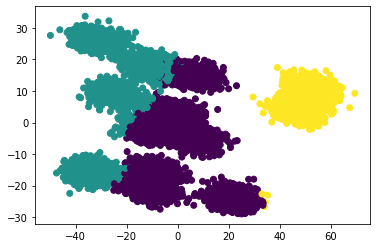

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)


## elbow method
elbow method จะ plot กราฟคล้ายๆศอก

SSE วัดระยะห่างของ center ทุกๆจุดว่าห่างกันเท่าไหร่ จากนั้นเอามา sum รวมกัน

ใกล้กับ center มากยิ่งดี


In [ ]:
kmeans.inertia_
#คำนวนค่า SSE

7668905.442202804

In [ ]:
SSE = list() #วนรูปเพื่อจะเปลี่ยน k จาก 1 เป็น2,3,4,5,6,7,8
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE #รันออกมาผลลัพธ์มีทั้งหมด 8 ตัว

[13996402.01220335,
 9375315.324471194,
 7668905.442202804,
 6546208.95669611,
 5465351.337933444,
 4728825.967559841,
 4058229.078380168,
 3303806.5447469153]

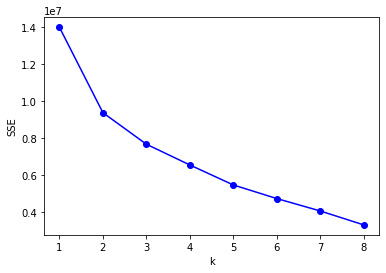

In [ ]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');
#นำค่า SSE ที่ได้มา plot กราฟ #elbow เท่ากับ  2 

## silhouette coefficient
1. How close the data point is to other points in the cluster คำนวณว่า data แต่ละอันที่อยู่ในกลุ่มเดียวกันมันอยู่ใกล้กับจุดอื่น ๆ ในคลัสเตอร์อย่างไร

2. How far away the data point is from points in other clusters จุดข้อมูลอยู่ห่างจากจุดในคลัสเตอร์อื่นแค่ไหน

In [ ]:
from sklearn import metrics
#import function metrics มาใช้

In [ ]:
SilH = list()  #silhouette scores คิดข้อมูลที่มีกลุ่มเดียวไม่ได้
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

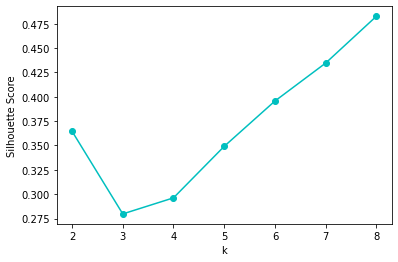

In [ ]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-c') #ดูกราฟจากจุด silhouette scores ที่สูงที่สุด มีค่ามากแสดงว่าใกล้กันมาก #ดีที่สุดคือ 8เพราะสูงสุด
plt.xlabel('k')
plt.ylabel('Silhouette Score');

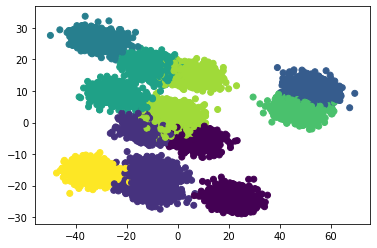

In [ ]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,)

จากกราฟจะบอกได้ว่ามี k ทั้งหมด 8 กลุ่ม และมีข้อมูลบางส่วนที่ทับซ้อนก่อน

### 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ใช้วิธี MDS Multidimensional Scaling

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)

In [ ]:
New_mds = mds.fit_transform(Data) #คำนวณระยะห่างระหว่างจุด

In [ ]:
kmeans2 = KMeans(n_clusters=8,random_state=2021)  #ให้ k= 8   ตามที่หาไว้
kmeans2.fit(Data)
g = kmeans2.predict(Data)

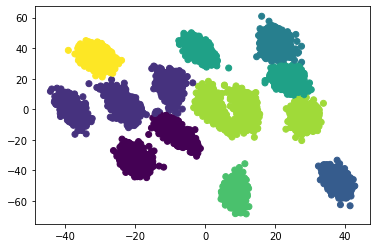

In [ ]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

### เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
จะทำการเปรียบเทียบด้วยกราฟ ดังนี้

กราฟของข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

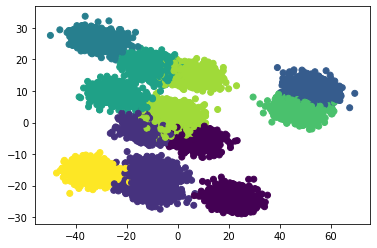

In [ ]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

กราฟของข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

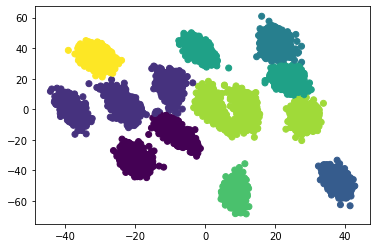

In [ ]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

จากการเปรียบเทียบข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ กับ ข้อ3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize 

ข้อมูลแบบ 2 มิติ จะเห็นได้ว่าถ้าเราลด dimension แล้วทำ clustering กราฟข้อ 3 จะมีการกระจายข้อมูลที่เปลี่ยนไป มีการกระจายข้อมูลเล็กลง เพราะ dimension ลดลง และระยะห่างยังคงเดิม ต่างจากข้อ 2 การกระจายของข้อมูลมีขนาดใหญ่เพราะไม่ได้ทำการลด dimension ก่อน
